In [1]:
import time
start_time=time.time()

In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft
import pandas as pd
import math
import sys
import os
from PIL import Image
import seaborn as sns
from scipy import interpolate
from sabreMod import sosf,sosfn

Brillo emisión

In [3]:
#ARCHIVO
FitsFile= 'Obs/TAURUS.HV.Ha.Peak'
hdul=fits.open(FitsFile + '.fits')

Text(0.5, 1.0, 'H$_{α}$ Flux')

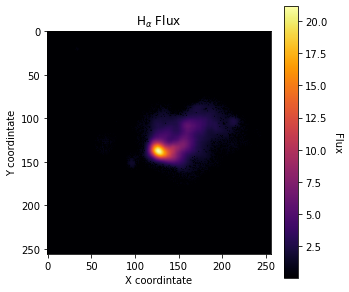

In [4]:
#IMAGEN
fig, ax = plt.subplots(figsize=(5, 5))


image_data=hdul[0].data
plt.imshow(image_data, cmap='inferno')
ax.set_xlabel('X coordintate')
ax.set_ylabel('Y coordintate')
cbar = plt.colorbar()
cbar.set_label('Flux', rotation=270, labelpad=15)  
plt.title('H$_{α}$ Flux')

#plt.savefig('TAURUS/'+reg+'FH.png')

In [5]:
#TABLA DATOS
flx=hdul[0].data
df=pd.DataFrame(flx)

In [6]:
dffx=df.stack().reset_index().rename(columns={'level_0':'Y', 'level_1':'X', 0:'I'})
dffx.describe()

,Y,X,I
count,65536.000000,65536.000000,6.553600e+04
mean,127.500000,127.500000,3.528891e-01
std,73.900834,73.900834,1.449902e+00
min,0.000000,0.000000,5.289438e-09
25%,63.750000,63.750000,5.289438e-09
50%,127.500000,127.500000,5.289438e-09
75%,191.250000,191.250000,5.289438e-09
max,255.000000,255.000000,2.115935e+01


Velocidad Radial

In [7]:
#ARCHIVO
FitsFile= FitsFile= 'Obs/TAURUS.HV.Ha.RV'
#FitsFile= 'n604halphasigma'
hdul=fits.open(FitsFile + '.fits')

Text(0.5, 1.0, 'H$_{α}$ Radial Velocity')

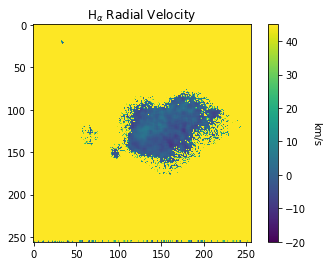

In [8]:
#IMAGEN
image_data=hdul[0].data
plt.imshow(image_data, cmap='viridis')
ax.set_xlabel('X coordintate')
ax.set_ylabel('Y coordintate')
cbar = plt.colorbar()
cbar.set_label('km/s', rotation=270, labelpad=15)  
plt.clim(-20,45) 
plt.title('H$_{α}$ Radial Velocity')
#plt.savefig('TAURUS/'+reg+'RVH.png')

In [9]:
#TABLA DATOS
vel=hdul[0].data
df=pd.DataFrame(vel)
#dfv=df.stack()
#dfv

In [10]:
dfvr=df.stack().reset_index().rename(columns={'level_0':'Y', 'level_1':'X', 0:'RV'})
dfvr.describe()

,Y,X,RV
count,65536.000000,65536.000000,65536.000000
mean,127.500000,127.500000,108.074671
std,73.900834,73.900834,40.049776
min,0.000000,0.000000,-15.575094
25%,63.750000,63.750000,122.940002
50%,127.500000,127.500000,122.940002
75%,191.250000,191.250000,122.940002
max,255.000000,255.000000,126.898609


Tabla General

In [11]:
data=dfvr
data['I']=dffx.I
data.describe()

,Y,X,RV,I
count,65536.000000,65536.000000,65536.000000,6.553600e+04
mean,127.500000,127.500000,108.074671,3.528891e-01
std,73.900834,73.900834,40.049776,1.449902e+00
min,0.000000,0.000000,-15.575094,5.289438e-09
25%,63.750000,63.750000,122.940002,5.289438e-09
50%,127.500000,127.500000,122.940002,5.289438e-09
75%,191.250000,191.250000,122.940002,5.289438e-09
max,255.000000,255.000000,126.898609,2.115935e+01


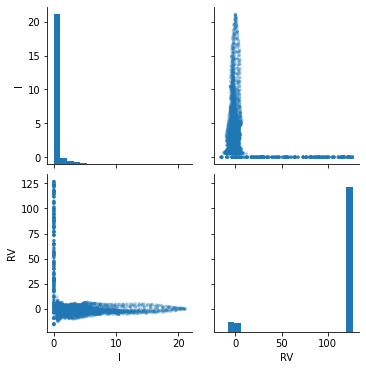

In [12]:
sns.pairplot(data, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

Ajuste de datos

In [13]:
mI=(data.I>data.I.mean()+0.5*data.I.std())
data=data[mI]

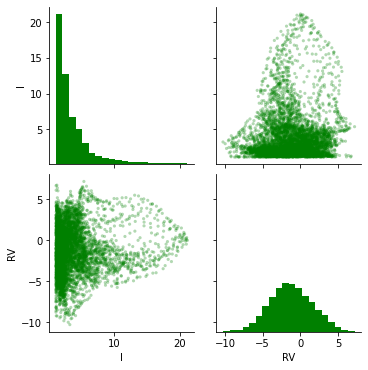

In [14]:
sns.pairplot(data, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none',color='green'),
             diag_kws=dict(bins=20, color="green"),
            )

#plt.savefig('TAURUS/'+reg+'CorrlHA.png')

In [15]:
data.describe()

,Y,X,RV,I
count,5903.000000,5903.000000,5903.000000,5903.000000
mean,121.002541,158.346265,-1.255422,3.712963
std,19.640746,27.275948,2.801085,3.281802
min,80.000000,93.000000,-10.268204,1.078257
25%,105.000000,136.000000,-3.170311,1.732948
50%,120.000000,159.000000,-1.340034,2.505177
75%,137.000000,179.000000,0.668808,4.383193
max,164.000000,220.000000,7.164047,21.159351


Text(0.5, 1.0, 'H$_{α}$ Flux')

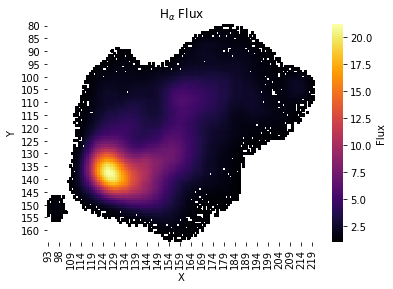

In [16]:
datal=data.copy()
#datal.I=np.log10(datal.I)
datal.X=datal.X.astype(int)
dataH_f=(datal.round(2)).pivot(index='Y', columns='X', values='I')
#fig, ax = plt.subplots(figsize=(17, 4))
sns.heatmap(dataH_f, cmap="inferno",xticklabels='auto',cbar_kws={'label': 'Flux'})
plt.title('H$_{α}$ Flux')
#plt.savefig('TAURUS/Imgs/A/'+reg+'FH.png')

Text(0.5, 1.0, 'H$_{α}$ Radial Velocity')

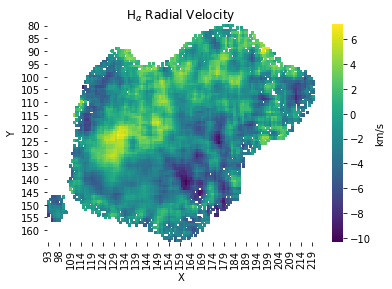

In [17]:
datal=data.copy()
dataH_rv=(datal.round(2)).pivot(index='Y', columns='X', values='RV')
sns.heatmap(dataH_rv, cmap="viridis",cbar_kws={'label': 'km/s'})
plt.title('H$_{α}$ Radial Velocity')
#plt.savefig('TAURUS/Imgs/A/'+reg+'RVH.png')

In [18]:
pc=0.63

1.0


[None, None]

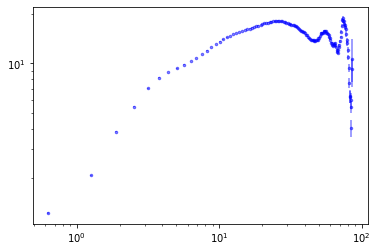

In [19]:
SF=sosf(data)
SF.Lag=SF.Lag*pc

fig,ax=plt.subplots()

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.5, markersize=5)

ax.set(xscale='log',yscale='log')

In [20]:
x=SF['Lag']
y=SF['Nmqvd']-(data["RV"].std())**2
tck=interpolate.splrep(x,y,s=0)
grid=np.linspace(x.min(),x.max(),num=len(x))
ynew=interpolate.splev(grid,tck,der=0)
inter=pd.DataFrame([grid,ynew]).T
SFr=interpolate.sproot(tck)
SFr

array([ 3.57113028, 81.8139932 , 85.33898065])

In [21]:
s=SFr[0]

In [22]:
ss=np.round((data['RV'].std())**2,2)

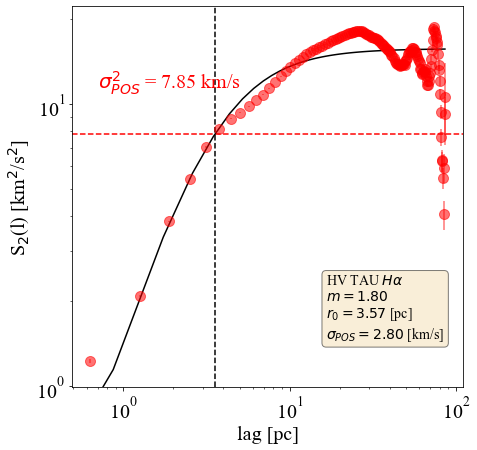

In [26]:
fig,ax=plt.subplots(figsize=(7,7))

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="red", ecolor="red",
                     alpha=0.55, markersize=20)

ax.set(xlabel='lag [pc]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')

plt.axhline(y=ss, color='r', linestyle='--')
ax.text(0.25, 0.8,'$σ_{POS}^{2}$ = '+str(ss)+' km/s', ha='center', va='center', transform=ax.transAxes, color='r')


plt.axvline(x=s, color='k', linestyle='--')

lo=s

n=1.8

x=np.linspace(int(SF.Lag.min()),int(SF.Lag.max()),100)
c=1/(1+(x/lo)**n)

y=2*(1-c)*ss

plt.loglog(x,y,color='k', linestyle='-')


textstr = '\n'.join(('HV TAU ' r'$Hα$' ,r'$m=%.2f$'%n, r'$r_{0}=%.2f$' % s+' [pc]',
                     r'$σ_{POS}=%.2f$' % (data["RV"].std()) + ' [km/s]' )) 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.65, .3, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="20"

#ax.set_xlim(1, 250)
#ax.set_ylim(1, 750)

#fig.savefig('Img//'+samples[0][i]+'.pdf')

In [24]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 933.1826603412628 seconds ---
